In [112]:
from segment_anything import SamPredictor, sam_model_registry
import cv2
import numpy as np

In [113]:
IMG_NAME = "1.jpg"

sam = sam_model_registry["vit_b"](checkpoint="../sam_vit_b_01ec64.pth")
sam.to(device="cuda:0")
sam = SamPredictor(sam)

In [114]:
image = cv2.imread("./images/{IMG_NAME}".format(IMG_NAME=IMG_NAME))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

sam.set_image(image)
masks, _, _ = sam.predict(
    point_coords=np.array([(2100,1300)]),
    point_labels=np.array([1]),
    multimask_output=True,)

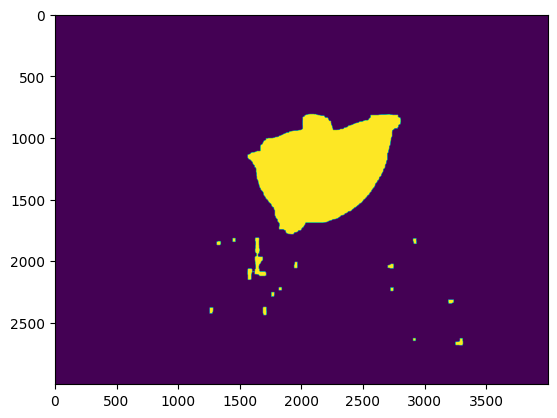

In [115]:
mask = masks[0]
mask = mask.astype(np.uint8)
#Perform dilation and erosion
kernel = np.ones((21,21),np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

#Show mask
import matplotlib.pyplot as plt
plt.imshow(mask)

In [116]:
import PIL
mask = PIL.Image.fromarray((mask*255).astype(np.uint8))
mask.save("./masks/{IMG_NAME}.png".format(IMG_NAME=IMG_NAME))